In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

607

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0eb8a9a36f66204a6c181b6165f05eed


In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | katsuura
Processing Record 2 of Set 1 | lompoc
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | victoria
Processing Record 7 of Set 1 | saint-philippe
Processing Record 8 of Set 1 | ancud
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | pisco
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | vaini
Processing Record 13 of Set 1 | puerto ayora
Processing Record 14 of Set 1 | tucuman
Processing Record 15 of Set 1 | port alfred
Processing Record 16 of Set 1 | arman
Processing Record 17 of Set 1 | samsun
Processing Record 18 of Set 1 | tubruq
City not found. Skipping...
Processing Record 19 of Set 1 | butaritari
Processing Record 20 of Set 1 | half moon bay
Processing Record 21 of Set 1 | westerland
Processing Record 22 of Set 1 | barrow
Processing Record 23 

Processing Record 35 of Set 4 | mozarlandia
Processing Record 36 of Set 4 | pevek
Processing Record 37 of Set 4 | karatau
Processing Record 38 of Set 4 | neuquen
Processing Record 39 of Set 4 | bantul
Processing Record 40 of Set 4 | talnakh
Processing Record 41 of Set 4 | saint george
Processing Record 42 of Set 4 | east london
Processing Record 43 of Set 4 | gorom-gorom
Processing Record 44 of Set 4 | faya
Processing Record 45 of Set 4 | saint-jean-de-maurienne
Processing Record 46 of Set 4 | alofi
Processing Record 47 of Set 4 | sao gabriel da cachoeira
Processing Record 48 of Set 4 | port blair
Processing Record 49 of Set 4 | forio
Processing Record 50 of Set 4 | dingle
Processing Record 1 of Set 5 | qandala
Processing Record 2 of Set 5 | hillsboro
Processing Record 3 of Set 5 | bereda
Processing Record 4 of Set 5 | ngukurr
City not found. Skipping...
Processing Record 5 of Set 5 | nioki
Processing Record 6 of Set 5 | umea
Processing Record 7 of Set 5 | sayan
Processing Record 8 of 

Processing Record 27 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 28 of Set 8 | iskateley
Processing Record 29 of Set 8 | husavik
Processing Record 30 of Set 8 | bargal
City not found. Skipping...
Processing Record 31 of Set 8 | bhakkar
Processing Record 32 of Set 8 | labytnangi
Processing Record 33 of Set 8 | independence
Processing Record 34 of Set 8 | alexandria
Processing Record 35 of Set 8 | eltham
Processing Record 36 of Set 8 | manzhouli
Processing Record 37 of Set 8 | merauke
Processing Record 38 of Set 8 | ulladulla
Processing Record 39 of Set 8 | mount gambier
Processing Record 40 of Set 8 | new richmond
Processing Record 41 of Set 8 | araouane
Processing Record 42 of Set 8 | weligama
Processing Record 43 of Set 8 | hadsund
Processing Record 44 of Set 8 | souillac
Processing Record 45 of Set 8 | pizarro
Processing Record 46 of Set 8 | barabai
Processing Record 47 of Set 8 | chinhoyi
Processing Record 48 of Set 8 | yumen
Processing Record 49 of Set 8 | ka

Processing Record 16 of Set 12 | dalnerechensk
Processing Record 17 of Set 12 | hihifo
City not found. Skipping...
Processing Record 18 of Set 12 | gisborne
Processing Record 19 of Set 12 | novopokrovka
Processing Record 20 of Set 12 | ballina
Processing Record 21 of Set 12 | oliveira dos brejinhos
Processing Record 22 of Set 12 | ossora
Processing Record 23 of Set 12 | los llanos de aridane
Processing Record 24 of Set 12 | altay
Processing Record 25 of Set 12 | moose factory
Processing Record 26 of Set 12 | nanortalik
Processing Record 27 of Set 12 | ushibuka
Processing Record 28 of Set 12 | auki
Processing Record 29 of Set 12 | pavlikeni
Processing Record 30 of Set 12 | uvarovo
Processing Record 31 of Set 12 | tiarei
Processing Record 32 of Set 12 | esso
Processing Record 33 of Set 12 | san policarpo
Processing Record 34 of Set 12 | viedma
Processing Record 35 of Set 12 | gorzow wielkopolski
Processing Record 36 of Set 12 | saint-joseph
Processing Record 37 of Set 12 | roald
Processi

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Katsuura,35.13,140.30,64.99,71,75,4.70,JP,2020-11-06 15:54:30
1,Lompoc,34.64,-120.46,59.00,82,90,10.29,US,2020-11-06 15:54:30
2,Ushuaia,-54.80,-68.30,51.80,40,20,9.17,AR,2020-11-06 15:54:30
3,Yellowknife,62.46,-114.35,10.99,85,90,4.70,CA,2020-11-06 15:50:03
4,Bluff,-46.60,168.33,47.17,86,10,11.01,NZ,2020-11-06 15:51:23
5,Victoria,22.29,114.16,79.00,58,54,5.99,HK,2020-11-06 15:51:44
6,Saint-Philippe,-21.36,55.77,73.40,73,90,18.34,RE,2020-11-06 15:53:09
7,Ancud,-41.87,-73.82,55.40,58,40,10.29,CL,2020-11-06 15:51:11
8,Kapaa,22.08,-159.32,71.60,100,75,5.82,US,2020-11-06 15:44:59
9,Pisco,-13.70,-76.22,64.99,88,90,8.05,PE,2020-11-06 15:45:32


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [12]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1604679042.115836

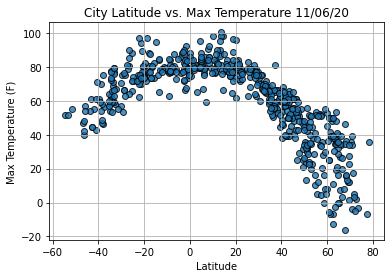

In [13]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

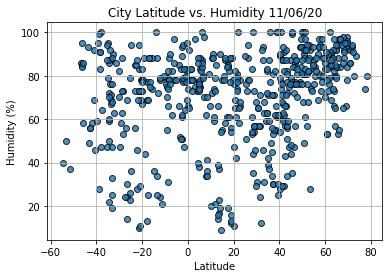

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()